In [2]:
# ============================================
# K-Nearest Neighbors on Iris Dataset
# ============================================

# Step 0: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report




--- Head of Dataset ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

--- Summary Statistics ---
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%       

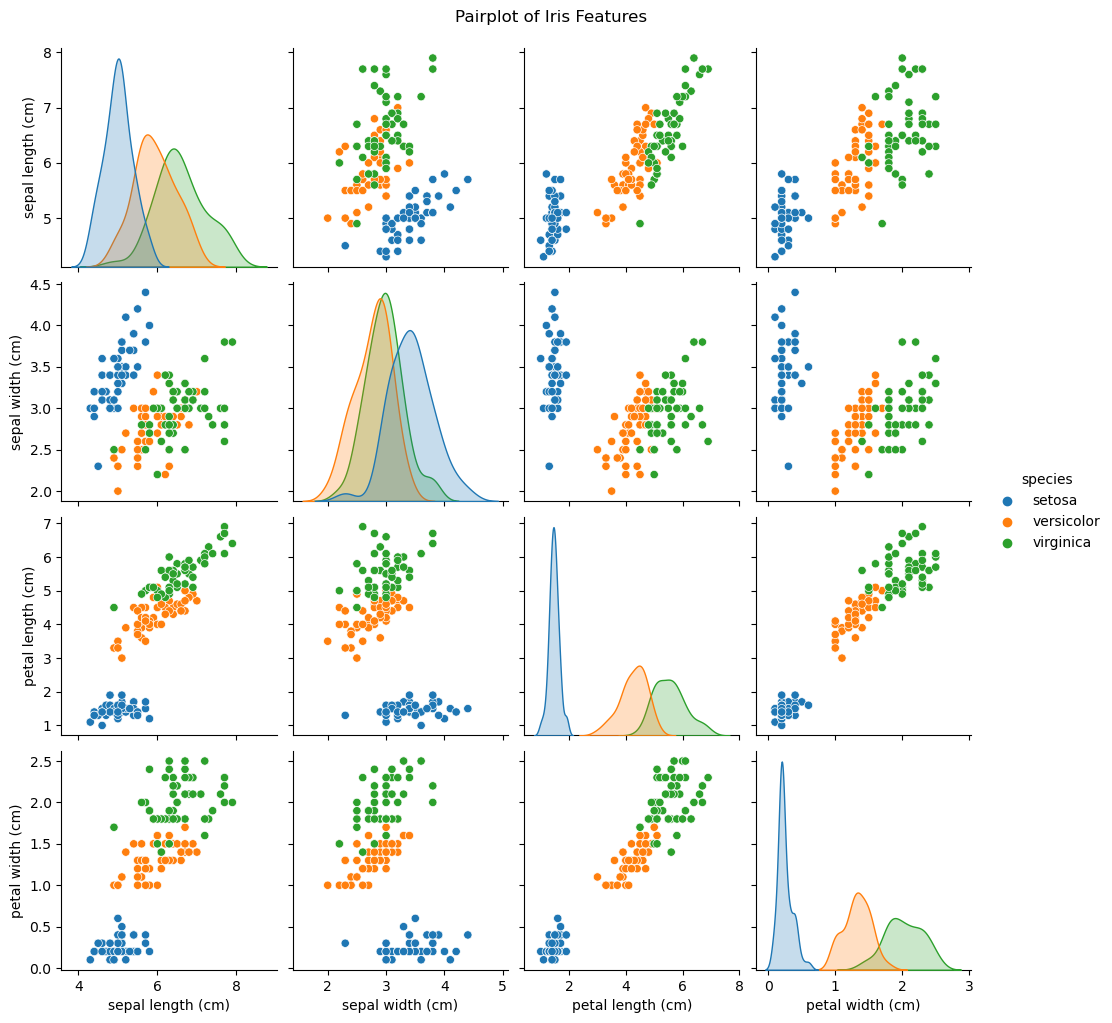

In [3]:
# ============================================
# Step 1: Load and Explore Dataset (EDA)
# ============================================

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Map target integers to species names
df['species'] = df['species'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

print("\n--- Head of Dataset ---")
print(df.head())

print("\n--- Summary Statistics ---")
print(df.describe())

print("\n--- Grouped by Species ---")
print(df.groupby('species').size())

# Optional Visualization
sns.pairplot(df, hue='species')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()



In [5]:
# ============================================
# Step 2: Feature Scaling
# ============================================

X = df.iloc[:, :-1].values  # features
y = df.iloc[:, -1].values   # target

# Split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [6]:
# ============================================
# Step 3: Training KNN Model
# ============================================

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)



KNeighborsClassifier()

In [7]:
# ============================================
# Step 4: Confusion Matrix & Accuracy Score
# ============================================

y_pred = knn.predict(X_test)

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\n--- Accuracy Score ---")
print("Accuracy:", accuracy_score(y_test, y_pred))




--- Confusion Matrix ---
[[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]

--- Accuracy Score ---
Accuracy: 0.9111111111111111


In [8]:
# ============================================
# Step 5: Classification Report
# ============================================

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))




--- Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



In [9]:
# ============================================
# Step 6: Comparing Error Rate with K Value
# ============================================

error_rate = []

# Try K values from 1 to 20
for k in range(1, 21):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    pred_k = knn_temp.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))



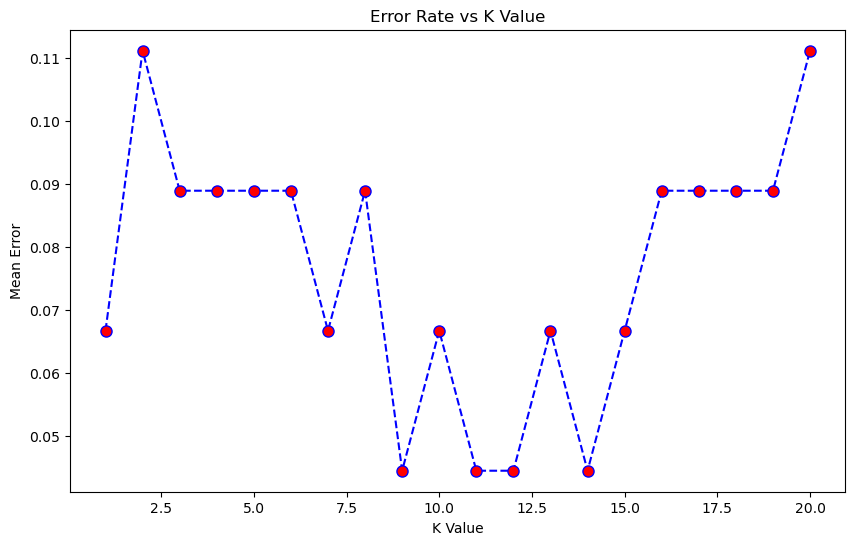

In [10]:
# ============================================
# Step 7: Plot Error Rate vs K Value
# ============================================

plt.figure(figsize=(10,6))
plt.plot(range(1,21), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()



In [11]:
# ============================================
# Step 8: Finding Best K
# ============================================

best_k = error_rate.index(min(error_rate)) + 1
print(f"\nBest K Value: {best_k}")

# Retrain with best K
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
final_pred = best_knn.predict(X_test)
final_acc = accuracy_score(y_test, final_pred)
print(f"Final Accuracy with K={best_k}: {final_acc:.2f}")




Best K Value: 9
Final Accuracy with K=9: 0.96


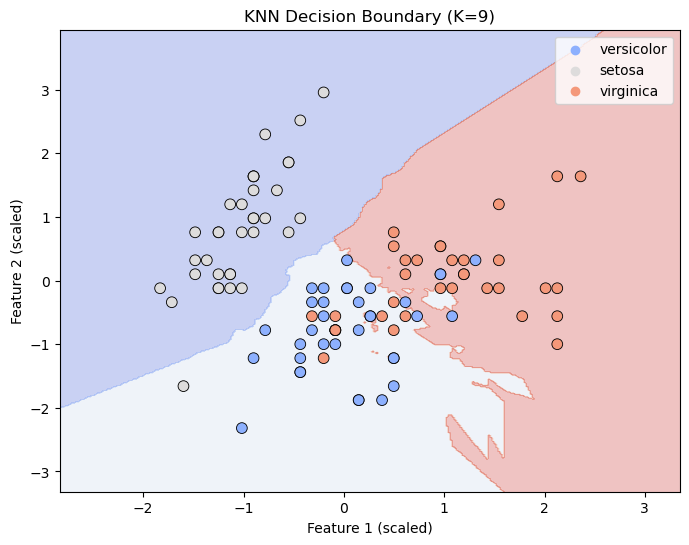

In [15]:
# ============================================
# Step 9: Visualize Test Result of KNN (Final Fixed)
# ============================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Handle both DataFrame and ndarray inputs safely
if hasattr(X_train, 'iloc'):
    X_vis = X_train.iloc[:, :2].values
else:
    X_vis = X_train[:, :2]

if hasattr(y_train, 'values'):
    y_vis = y_train.values.ravel()
else:
    y_vis = y_train.ravel()

# Encode string labels to numeric for contour plotting
le = LabelEncoder()
y_encoded = le.fit_transform(y_vis)

# Fit KNN model using only 2D features
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_vis, y_encoded)

#  Create meshgrid for decision boundary
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

#  Predict over the grid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#  Plot decision boundary and actual points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1],
                hue=y_vis, palette='coolwarm', s=60, edgecolor='k')

plt.title(f'KNN Decision Boundary (K={best_k})')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()
